In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *
from AnalyseDefectsMinimal import AnalyseDefectsMinimal

In [2]:
def gen_analysis_dict(LL, mode):

    dshort = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd', \
              suffix = "short", priority = -1, LX = LL, Nframes = 200, Ninfo = 2000)
    dlong = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd_l', \
                suffix = "l", priority = 0, LX = LL, Nframes = 200, Ninfo = 5000)
    dvery_long = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd_vl',\
                    suffix = "vl", priority = 3, LX = LL, Nframes = 500, Ninfo = 10000)

    defect_list = [dshort, dlong, dvery_long,] if mode == 'all' else [dshort]
    return defect_list

In [3]:
LL = 512
output_path = f'data\\na512sd'
mode = 'all' # 'all' or 'short'

defect_list = gen_analysis_dict(LL, mode)
 
ad = AnalyseDefectsMinimal(defect_list, output_path=output_path)


In [11]:
ad.extract_results()

Analyse defects for input folder C:\Users\Simon Andersen\Documents\Uni\Speciale\Hyperuniformity\na512sd
Analyse defects for input folder C:\Users\Simon Andersen\Documents\Uni\Speciale\Hyperuniformity\na512sd_l
Analyse defects for input folder C:\Users\Simon Andersen\Documents\Uni\Speciale\Hyperuniformity\na512sd_vl


In [13]:
ad.analyze_defects()

NB: All simulations are set to converge at the first frame for dataset 0. To change this, call update_conv_list.

NB: All simulations are set to converge at the first frame for dataset 1. To change this, call update_conv_list.

NB: All simulations are set to converge at the first frame for dataset 2. To change this, call update_conv_list.



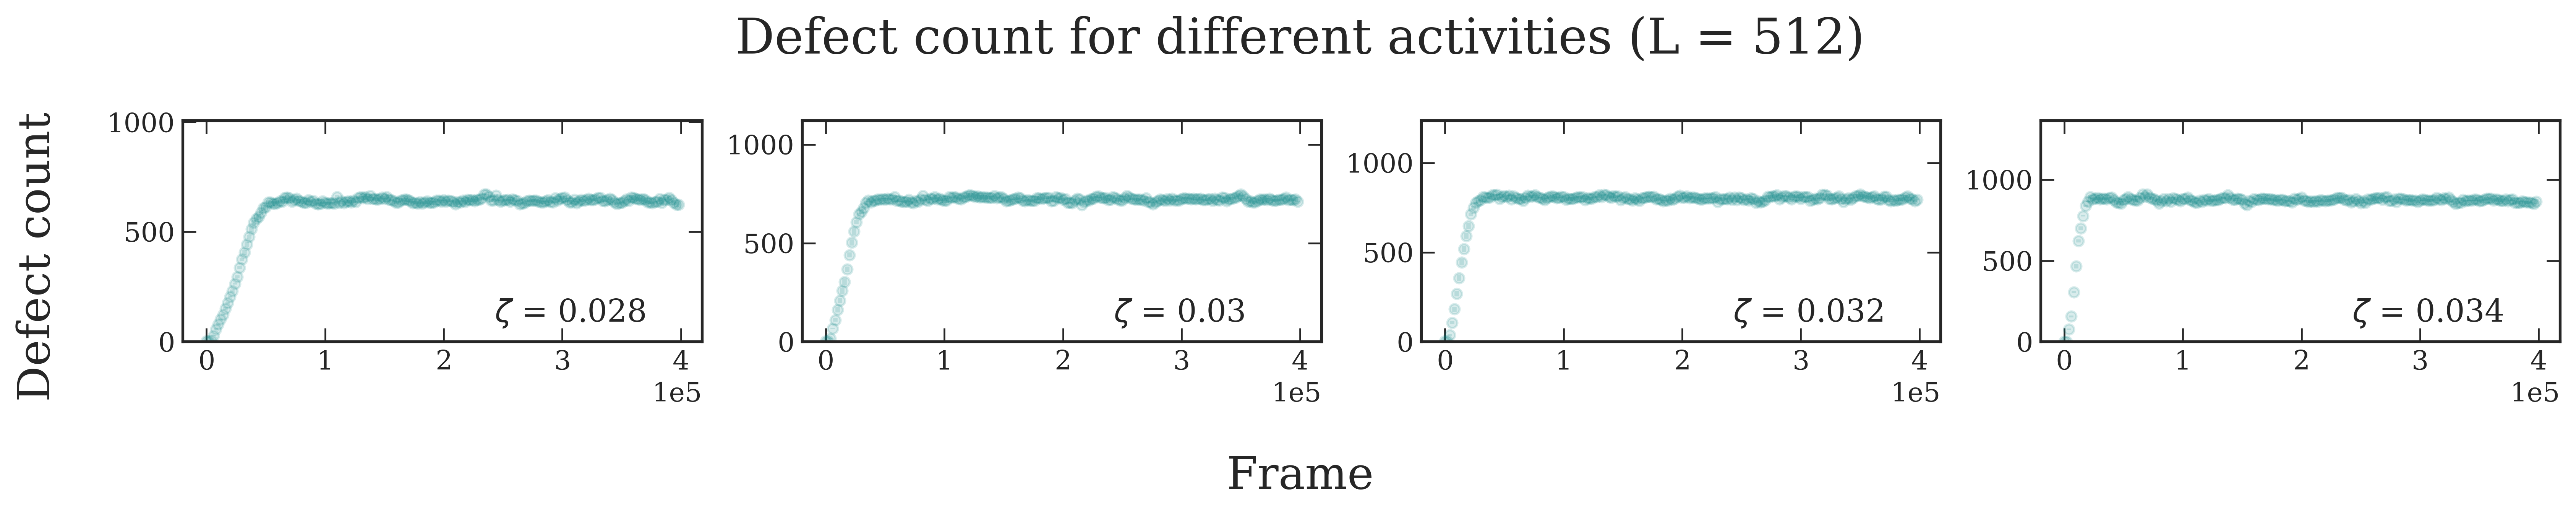

(<Figure size 6720x1260 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

In [4]:
ad.plot_defects_per_activity(Ndataset=0)

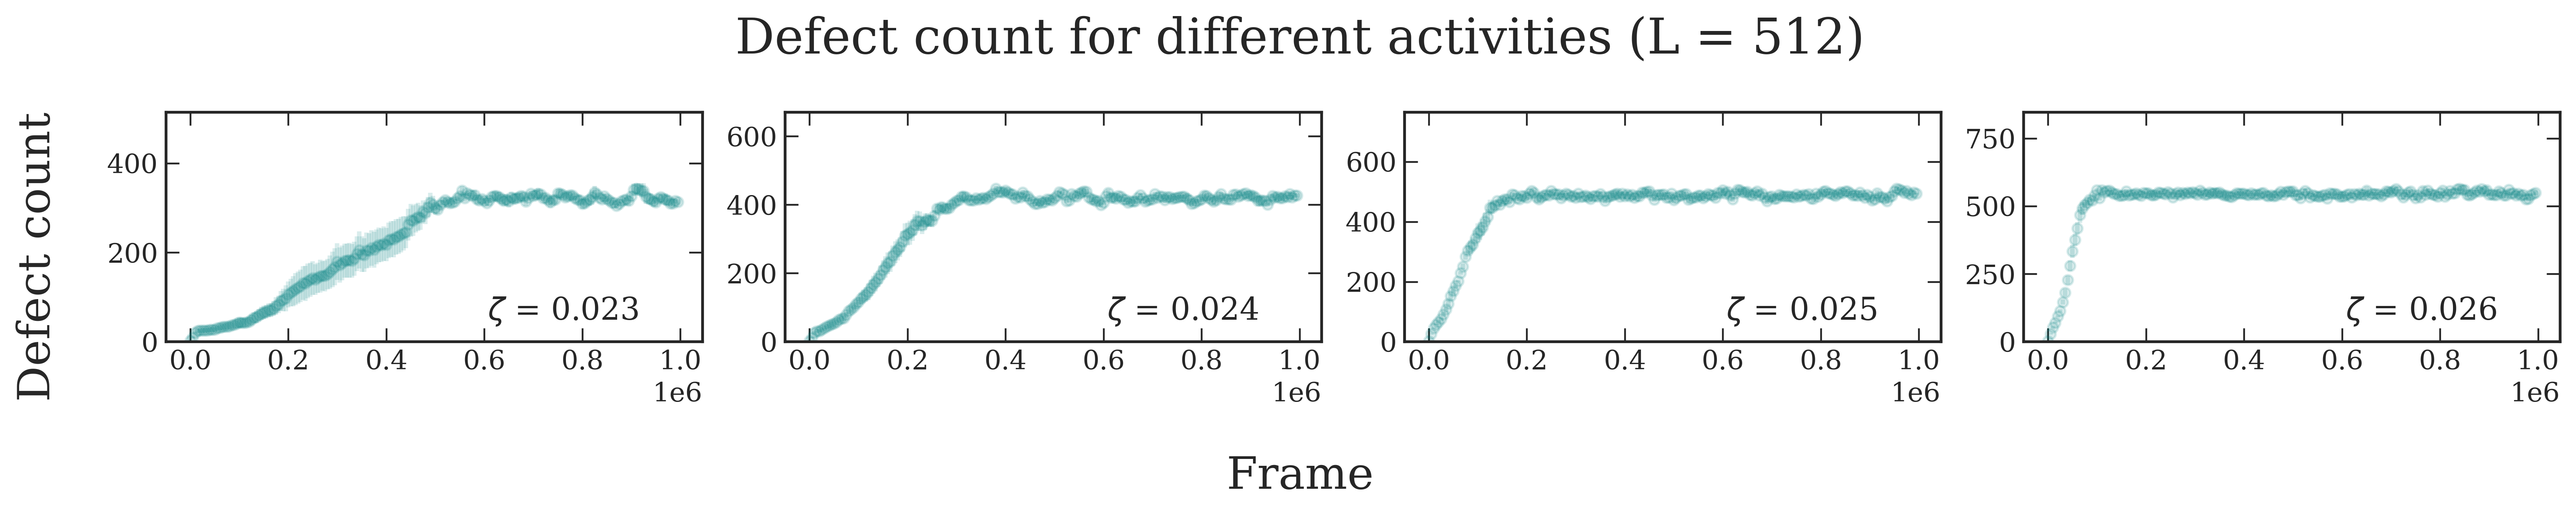

(<Figure size 6720x1260 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

In [5]:
ad.plot_defects_per_activity(Ndataset=1)

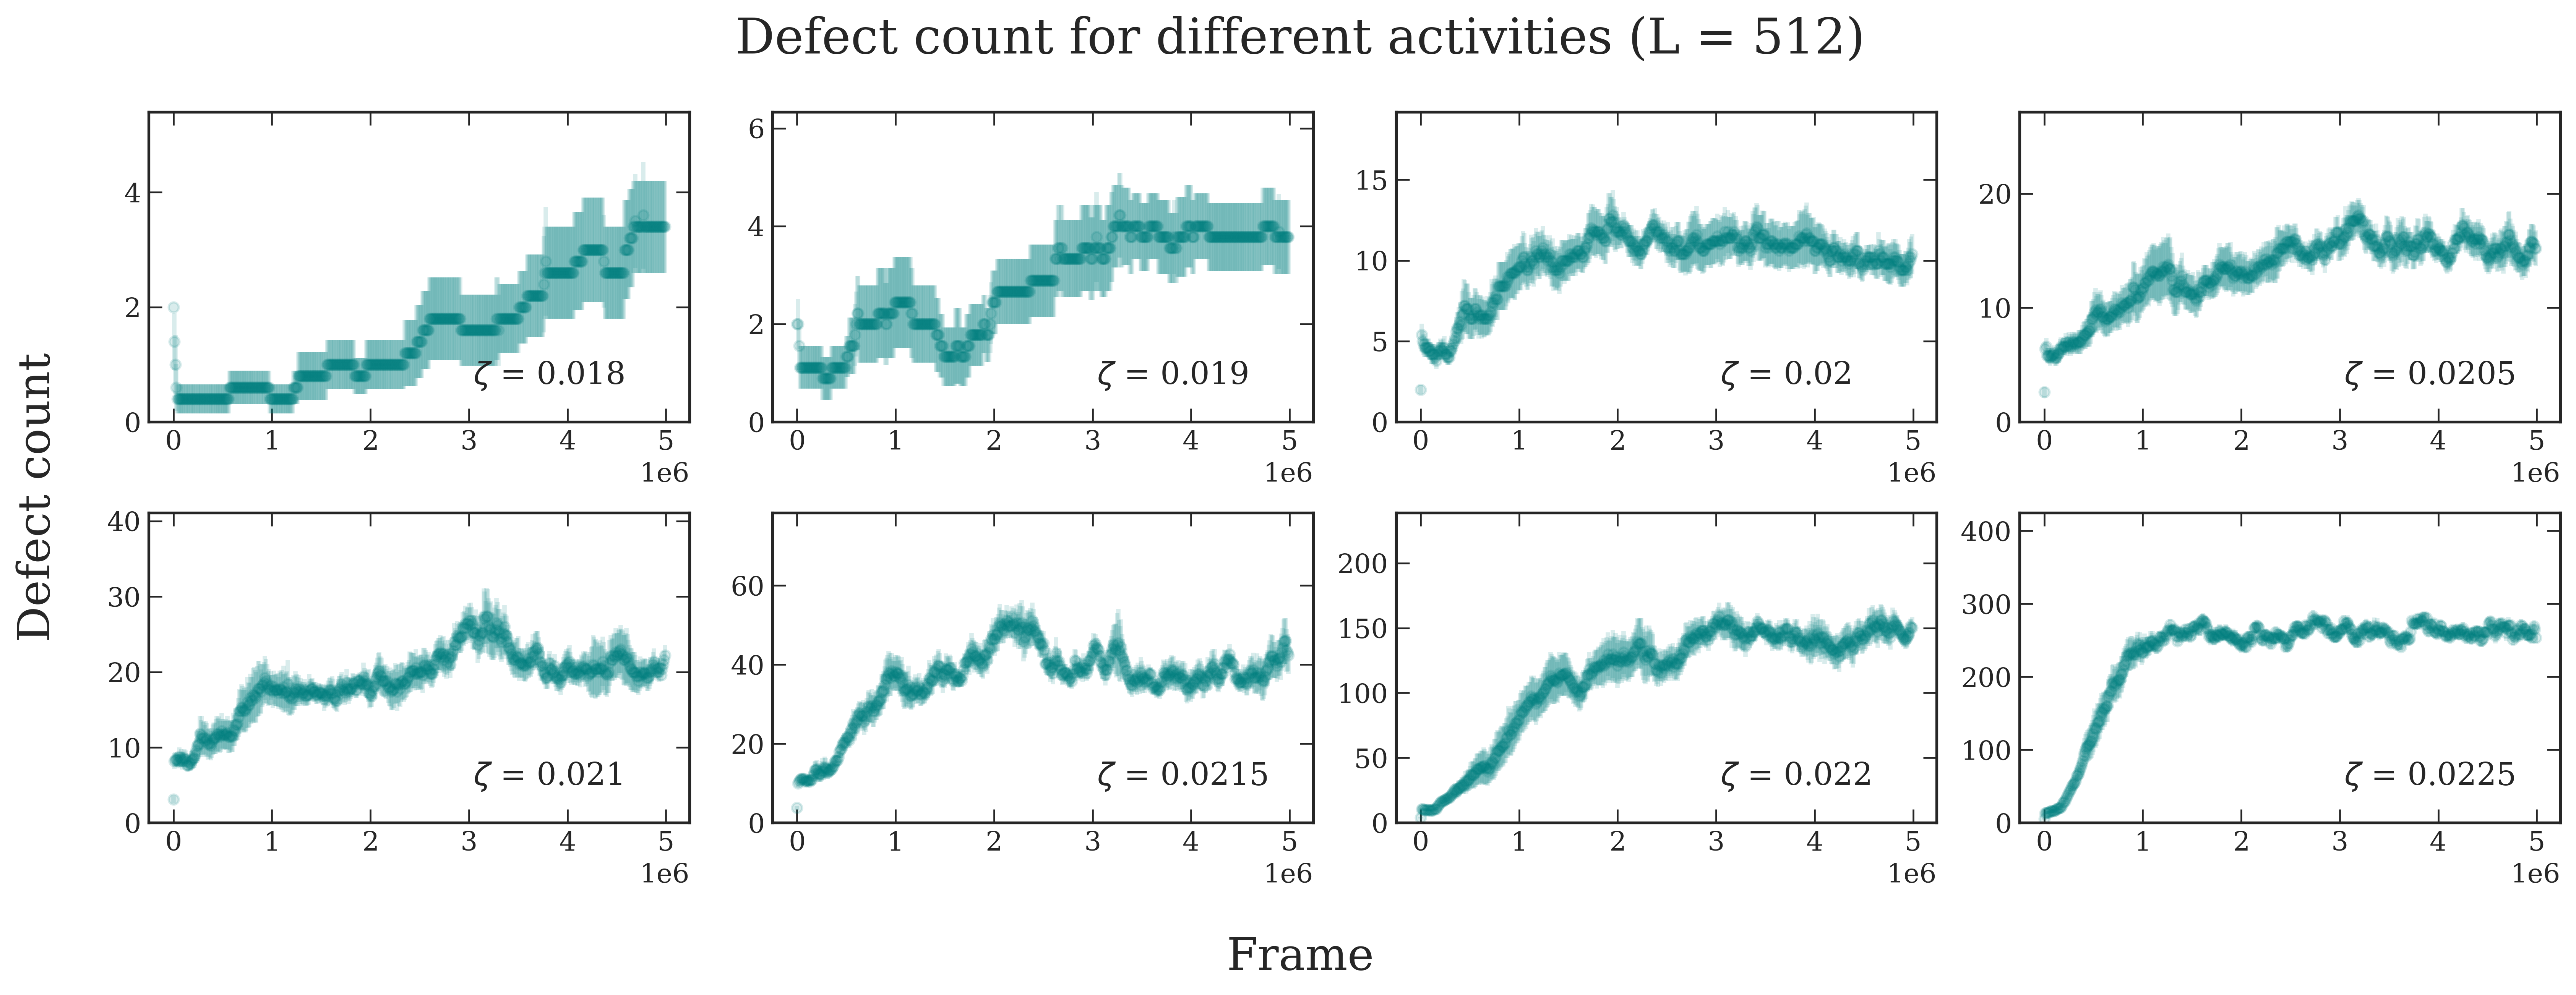

(<Figure size 6720x2520 with 8 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >], dtype=object))

In [6]:
ad.plot_defects_per_activity(Ndataset=2)

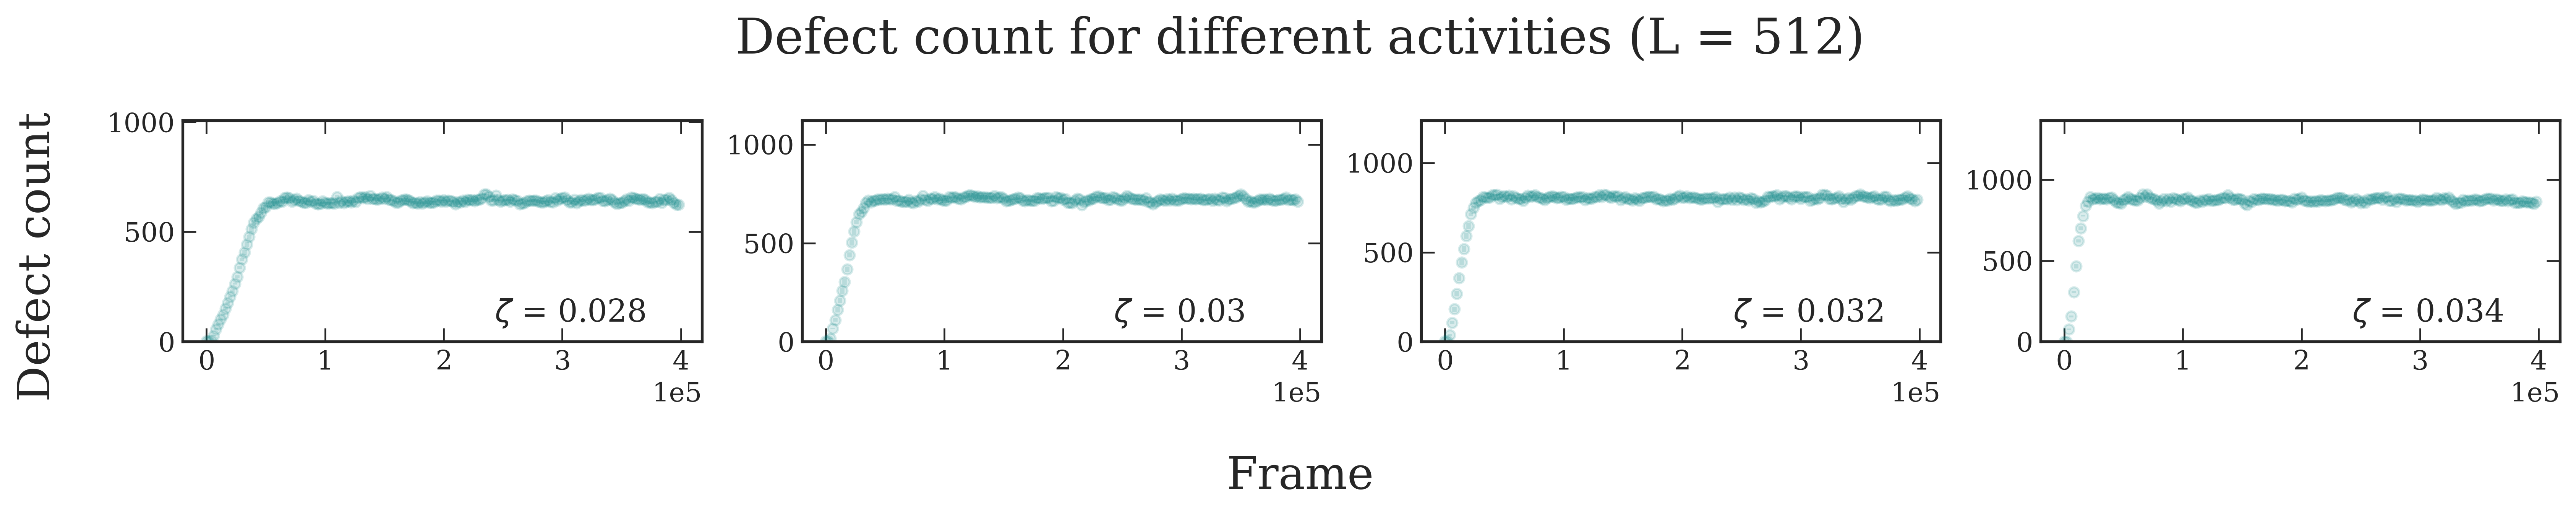

ValueError: invalid literal for int() with base 10: ''

In [7]:
ad.update_conv_list(Ndataset_list=[0, 1, 2])